## Review of key math concepts: Trigonometric Functions and Logarithms

The **trigonometric functions** sin, cos, and tan are used to describe the ratios of the side lengths for a right triangle:
![](https://www.mathsisfun.com/algebra/images/sin-cos-tan.svg)

Because angles can only range from $0-360^{\circ}$ or $0-2\pi$ radians, these functions are **periodic**, meaning that their values repeat at regular intervals. A few key values for these functions can be remembered using the unit circle. The cosine is given by the x coordinate, and the sin by the y coordinate. Looking at the unit circle below, what is the cosine of $\pi/3$?
![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Unit_circle_angles_color.svg/768px-Unit_circle_angles_color.svg.png)

Imagine that your draw a right triangle by connecting a given point on the circle to the x axis. The angles in a right triangle must be $\leq 90^{\circ}$, but the definition of the trigonometric functions can be extended to the full range of angles.

**Exponentiation** is the process by which a number is multiplied by itself a certain number of times. For example, $10^{2} = 10\times 10$. The exponent here is 2. **Logarithms** answer the question "what power do we raise a number to in order to get another number"? The logarithm essentially "undoes" the exponentiation:
\begin{align}
10^2 &= 100\\
\log_{10}(100) &= 2
\end{align}
More generally:
![](https://www.mathsisfun.com/algebra/images/exponent-to-logarithm-gen.gif)

Here, $a$ is called the "base" of the logarithm, and $x$ is the value of the exponent. Let's look at another example:
What is the log base 2 of 8? In other words, what power to we raise 2 to in order to get 8? $$\log_{2}(8) = ?$$
The most common bases for logarithms are base 10 and base-$e$, where $e = 2.71828 ... $ is Euler's number. Typically, if we want log base 10, we drop the subscript and just express it as $\log{1000} = 3$. Log base $e$ is called the natural logarithm, and is typically denoted by $\ln{e^{5}} = 5$. Note however, that using numpy functions, the natural log is called `np.log()` and log base 10 is called `np.log10()`. 

You can't always read the logarithm directly just by looking at a number. For example, what is $\ln{7}$? Add a cell below, and calculate it using `numpy`. Don't forget you need to import this library first. Check your answer by calculating the exponential $e^{x}$ to make sure that it equals 7.

We can also use logarithms for plotting. For example, make a plot of $y = x^{10}$ for values of x ranging from 0-50. What happens if you set the y-axis to show on a logarithmic (base 10) scale instead of the usual linear scale. Use `plt.yscale('log')`. For more info on logarithms, check out this [page.](https://www.mathsisfun.com/algebra/logarithms.html)

## Introduction to waves and the Fourier Transform

All waves are characterized by two principal quanitites, the amplitude, $A$ and the phase, $\phi$. Let's consider the general form of a wave that varies in time:
$$h(t) = A(t)\cos(\phi(t))$$
Remember that $\sin$ and $\cos$ are just related by a phase shift:
$$\sin(t) = \cos(t - \frac{\pi}{2})$$

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, 't')

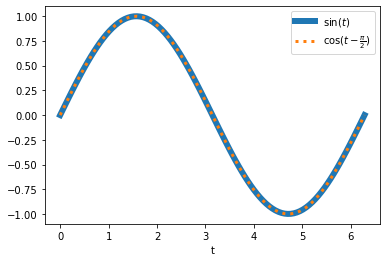

In [2]:
%pylab inline
t = np.linspace(0,2*np.pi,100)
sin = np.sin(t)
cos_shifted = np.cos(t-np.pi/2)
plt.plot(t,sin, lw=6, label=r'$\sin(t)$')
plt.plot(t,cos_shifted,ls=':', lw=3, label=r'$\cos(t-\frac{\pi}{2})$')
plt.legend()
plt.xlabel('t')

Now let's look at some specific examples:  
1) $h(t) = 2\sin(3t)$

Text(0, 0.5, 'h(t)')

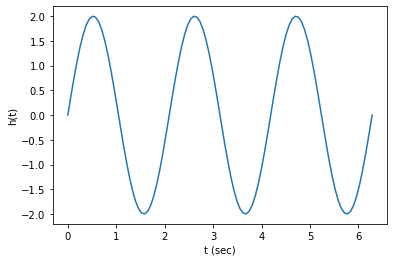

In [3]:
h = 2*np.sin(3*t)
plt.plot(t, h)
plt.xlabel('t (sec)')
plt.ylabel('h(t)')

What are the amplitude and phase of the above wave? The period, $T$, is defined as time between successive wave crests. Crests correpond to the maxima of the wave, and troughs to the minima. What is the period of the above wave? For a wave of the form $x = \sin(At)$, the period can be calculated as $T = 2\pi/A$, since the $\sin$ function is periodic over $2\pi$. The frequency is the number of wave crests per unit time: $f = 1/T$. What is the frequency of the wave in Hz if the time is measured in seconds?

Let's look at a more complicated example:  
2) $h(t) = 2t^{2}\cos(3t+\pi)$

Text(0, 0.5, 'h(t)')

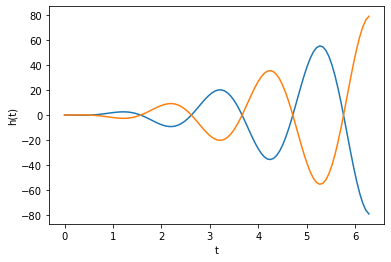

In [6]:
h2 = 2*t**2*np.cos(3*t+np.pi)
plt.plot(t,h2)
plt.xlabel('t')
plt.ylabel('h(t)')

What is the amplitude of the wave, and how is it changing in time? What is the phase of the wave? What happens to the wave if you remove the phase shift of $\pi$? Plot it to see!

### Fourier Series
Sometimes a wave may be a sum of multiple waves with different frequencies and amplitudes. In this case, it can be written as a **Fourier Series**:
$$h(t) = \sum_{n} B_{n}\sin(nt) + \sum_{n} C_{n}\cos(nt)$$
The **Fourier coefficients** $B_{n}$ and $C_{n}$ give the amplitudes for specific frequencies. Let's look at a specific example:
$$ h(t) = 5\sin(5t) + 8\cos(2t) + 4\sin(8t)$$
What are the Fourier coefficients for this wave? What frequencies do they correspond to? Hint: calculate the periods, $T$, for each of the different sinusoids being added. Those are the inverses of the frequencies of each Fourier coefficient. 

Text(0, 0.5, 'h(t)')

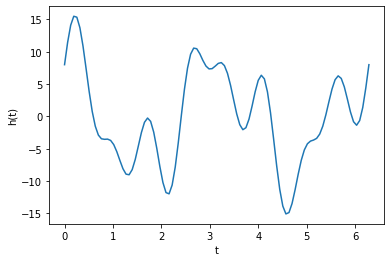

In [8]:
h = 5*np.sin(5*t) + 8*np.cos(2*t) + 4*np.sin(8*t)
plt.plot(t, h)
plt.xlabel('t')
plt.ylabel('h(t)')

### The Fourier Transform
The Fourier Series showed us that the complicated-looking wave above can be written concisely in terms of its frequency content. In this way, the time representation of a wave and the frequency representation are complementary and each carries enough information to fully define the wave. The **Fourier Transform** will allow us to go between the two representations. When we use real data like gravitational-wave strain, we are not able to express $h(t)$ as a continuous function, like $\sin(t)$. In this case, we will only have discrete samples for $h(t)$, which we will denote as $h_t$, where $t$ is now a subscript indicating the index of the sample. For such discretely-sampled data, we can calculate $h_f$ using:
\begin{align}
h_f &= \sum_{t=0}^{N-1}h_t e^{-2\pi itf/N}\\
&= \sum_{t=0}^{N-1} h_t \bigg[ \cos\big(\frac{2\pi tf}{N}\big)-i\sin\big(\frac{2\pi tf}{N}\big)\bigg]
\end{align}
where $N$ is the total number of data points included in $h_t$. This looks complicated, but luckily there are algorithms that already exist that compute the Fourier transform for us!

In [9]:
hf = np.fft.rfft(h)

What are the frequencies corresponding to `hf` as computed above? First, we need to know the sampling rate and duration in seconds of our original time series, $h_t$. The **sampling rate** is defined as $1/\Delta t$, where $\Delta t$ is the time between successive samples:

In [10]:
dt = t[1]-t[0]
print(dt)
srate = 1./dt
duration = t[-1]-t[0]
print('Sampling rate: {} Hz, duration: {} sec'.format(srate, duration))

0.06346651825433926
Sampling rate: 15.756339366097638 Hz, duration: 6.283185307179586 sec


Now we can compute the corresponding frequency series. The maximum frequency, also known as the **Nyquist frequency** is given by $f_{Ny} = srate/2$. Why can't we probe content at higher frequencies? This is because we need to be able to observe both the peak and the trough of each wave, so we need at least two samples per cycle. This sets the Nyquist frequency. The spacing of the frequency array is given by $\Delta f = 1/duration$. 

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$h_f$')

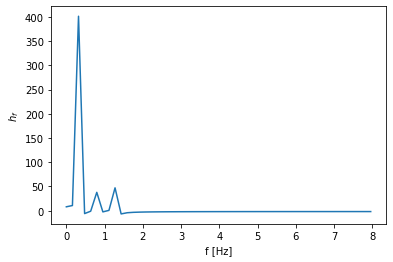

In [11]:
frequencies = np.arange(0, srate/2+1./duration, 1./duration)
plt.plot(frequencies, hf)
plt.xlabel('f [Hz]')
plt.ylabel(r'$h_f$')

Now let's compute the frequencies corresponding to the three peaks we observe here:

In [12]:
peaks = np.where(hf>30)
print(frequencies[peaks])

[0.31830989 0.79577472 1.27323954]


They match with the frequencies we computed for the components of the Fourier Series! So the Fourier transform basically allows you to calculate the Fourier series components for any arbitrary function, particularly when you can't break it down into components just by inspection. For more info, check out this [link.](https://phys.libretexts.org/Bookshelves/Ancillary_Materials/Demos%2C_Techniques%2C_and_Experiments/Fourier_Transform%2C_A_Brief_Introduction)

### Challenge exercise
Calculate the Fourier transform of the following wave:
$$ h(t) = 8\sin(12t) + 2\cos(27t) + 14\cos\big(\frac{5t}{6}\big)$$
At what frequencies do you expect there to be peaks? Does this agree with what you find when you take the transform? Also plot the wave and its transform.